# Étude des prix du foncier à Marseille
Kenza Miousset, Nour Khenissi, Antonin Henriet

> ## Objectifs

Nous souhaitions travailler sur les prix du foncier dans une ville de France, car cela nous permettait de mettre en place tous les aspects du projet demandé : webscraping, machine learning et visualisation dans l'espace. Néanmoins, nous ne voulions pas nous tourner vers Paris, qui est une ville beaucoup étudiée et où les inégalités socio-spatiales sont déjà bien documentées. L'idée de travailler sur Marseille nous est venue en remarquant que la cité phocéenne était aussi très inégalitaire : La valeur foncière varie beaucoup selon les quartiers dans lesquels on se trouve. Nous sommes donc partis de cette base pour tenter de décrire les inégalités socio-spatiales à Marseille en se fondant sur les prix du foncier.

> ## Structure

Ce projet se structure en 4 parties :
> - **Webscraping et nettoyage des données**
> - **Analyse exploratoire descriptive des données**
> - **Modélisation de la valeur foncière en fonction des arrondissements**
> - **Cartographie des inégalités spatiales**

Les données sont téléchargées ou scrappées en ligne, puis nettoyées et mises en forme dans le dossier *Data*. Le notebook principal est **Notebook_final**, qui fait appel à d'autres notebooks.

### Importations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import scipy.stats.mstats as mstats

## I. Récupération des données et nettoyage

On se concentre sur deux bases de données. La première provient de data.gouv (https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/), mise à disposition par Demande de valeurs foncières (DVF) et qui concerne l'ensemble des transactions foncières réalisées en France hors Alsace, Moselle et Mayotte. Le deuxième a été récoltée par nos soins en scrapant le site immobilier du Figaro (https://immobilier.lefigaro.fr/prix-immobilier/marseille/ville-13055#prix-quartier) concernant Marseille. L'objectif est de déterminer si l'une des bases est plus fiable que l'autre, et la distinction de nature entre ces données (transactions *réalisées* versus prix *affichés*) comporte aussi une valeur interprétative.

In [41]:
!git clone https://github.com/nkhenissi/pyhton-for-the-data-scientist.git

Cloning into 'pyhton-for-the-data-scientist'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 330 (delta 87), reused 48 (delta 23), pack-reused 176
Receiving objects: 100% (330/330), 1.64 MiB | 9.20 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [42]:
%cd pyhton-for-the-data-scientist

/home/onyxia/work/pyhton-for-the-data-scientist/pyhton-for-the-data-scientist/pyhton-for-the-data-scientist


> ### DVF

On récupère d'abord la base de données de Demande de valeurs foncières, présente dans le notebook *DVF.ipynb*.

In [43]:
%run Data/DVF.ipynb
df_DVF=df5
df_DVF

Code service sages            100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.915336
No voie                        35.686981
B/T/Q                          95.316833
Type de voie                   38.409037
Code voie                       0.767595
Voie                            0.772418
Code postal                     0.770589
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.549758
Section                         0.004091
No plan                         0.000000
No Volume                      99.783828
1er lot         

,Nature mutation,Valeur fonciere,Code postal,Commune,Code type local,Surface reelle bati
400821,Vente,260000.0,13016,MARSEILLE 16EME,2,45.0
400822,Vente,260000.0,13016,MARSEILLE 16EME,2,52.0
400823,Vente,260000.0,13016,MARSEILLE 16EME,2,15.0
400824,Vente,260000.0,13016,MARSEILLE 16EME,2,60.0
400833,Vente,266250.0,13004,MARSEILLE 4EME,2,60.0
...,...,...,...,...,...,...
441051,Vente,215000.0,13013,MARSEILLE 13EME,2,20.0
441152,Vente,520000.0,13011,MARSEILLE 11EME,2,45.0
441153,Vente,520000.0,13011,MARSEILLE 11EME,2,37.0
441154,Vente,520000.0,13011,MARSEILLE 11EME,2,100.0


Le nettoyage des données est consultable dans le notebook *Data.ipynb* du dossier Data. On a en somme importé les données, gardé les colonnes du dataframe qui nous intéressent, gardé les données concernan  les appartements, les données concernant les "Ventes" et les données concernant Marseille.

On obtient donc 1143 observations concernant tous les arrondissements de Marseille

> ### Scraping du site du Figaro


Le code est présent dans le notebook *webscraping figaro v2-2.ipynb*, dans le dossier Data.

In [ ]:
%run Data/webscraping figaro v2-2.ipynb
data_arr

<table class="odTable odTableAuto">
<thead>
<tr>
<th class="odGradient" style="width: 50%;">Nombre de pièces</th>
<th class="odGradient" style="width: 50%;">Prix au m2</th>
</tr>
</thead>
<tbody>
<tr>
<td>Studios / 1 pièce</td>
<td>4 457 €/m2</td>
</tr>
<tr>
<td>2 pièces</td>
<td>4 238 €/m2</td>
</tr>
<tr>
<td>3 pièces</td>
<td>3 738 €/m2</td>
</tr>
<tr>
<td>4 pièces</td>
<td>4 107 €/m2</td>
</tr>
<tr>
<td>5 pièces</td>
<td>4 530 €/m2</td>
</tr>
<tr>
<td>6 pièces</td>
<td>4 506 €/m2</td>
</tr>
<tr>
<td>7 pièces et plus</td>
<td>3 904 €/m2</td>
</tr>
</tbody>
</table>
<tr>
<td>Studios / 1 pièce</td>
<td>4 457 €/m2</td>
</tr>
<tr>
<td>2 pièces</td>
<td>4 238 €/m2</td>
</tr>
<td>2 pièces</td>
2 pièces
2 pièces
4 238 €/m2
['Studios / 1 pièce', '4\xa0457 €/m2']
['2 pièces', '4\xa0238 €/m2']
['3 pièces', '3\xa0738 €/m2']
['4 pièces', '4\xa0107 €/m2']
['5 pièces', '4\xa0530 €/m2']
['6 pièces', '4\xa0506 €/m2']
['7 pièces et plus', '3\xa0904 €/m2']
<tr>
<td><strong><a href="https://immobilier.

,prix m2,loyer m2
Marseille 1er Arrondissement,3 610 €/m2,17 €/m2
Marseille 2e Arrondissement,3 967 €/m2,17 €/m2
Marseille 3e Arrondissement,2 171 €/m2,16 €/m2
Marseille 4e Arrondissement,3 321 €/m2,16 €/m2
Marseille 5e Arrondissement,3 784 €/m2,18 €/m2
Marseille 6e Arrondissement,4 316 €/m2,18 €/m2
Marseille 7e Arrondissement,5 603 €/m2,19 €/m2
Marseille 8e Arrondissement,5 686 €/m2,18 €/m2
Marseille 9e Arrondissement,4 529 €/m2,17 €/m2
Marseille 10e Arrondissement,3 531 €/m2,16 €/m2


Le dataframe qu'on obtient, *data_arr*, paraît plus cohérent que le dataframe *df_DVF*.

## II. Analyse descriptive exploratoire



On cherche d'abord à manipuler les bases de données en notre possession de manière très descriptive pour tirer des premiers enseignements des données disponibles

> ## Prix constatés de DVF

On s'intéresse d'abord aux prix déclarés et disponibles sur le site de DVF (Demande de valeurs foncières). Ce sont des prix pour l'année 2021 concernant les transactions à Marseille.

In [44]:
round(df_DVF.describe(),2)

,Valeur fonciere,Surface reelle bati
count,1143.00,1143.00
mean,532362.04,46.43
std,352294.36,32.70
min,30000.00,1.00
25%,295000.00,27.00
50%,440000.00,37.00
75%,700000.00,56.00
max,1900000.00,410.00


Notre jeu de données comporte 1143 individus. On se concentre sur 3 variables :
- La **valeur foncière** : Un bien appartement vendu en 2021 à Marseille valait en moyenne 532 362€. La variance de la valeur foncière est énorme : les prix sont éclatés et ne suivent en effet pas du tout une loi normale.
- La **surface bâtie** : Un bien immobilier bâti vendu à Marseille en 2021 faisait en moyenne 46,5 $m{^2}$, et la médiane est de 37 $m{^2}$. La variance de la surface bâtie est beaucoup moins élevée que pour la valeur foncière.

Représentons maintenant le prix moyen constaté du $m{^2}$ à la vente à Marseille en 2021 en fonction des arrondissements :

In [45]:
DVFmoy=df_DVF.groupby("Commune", as_index=False).mean(numeric_only=True)
round(DVFmoy, 2)

,Commune,Valeur fonciere,Surface reelle bati
0,MARSEILLE 10EME,399420.35,34.65
1,MARSEILLE 11EME,424264.00,60.43
2,MARSEILLE 12EME,435266.98,49.34
3,MARSEILLE 13EME,362275.07,55.04
4,MARSEILLE 14EME,303087.50,65.29
5,MARSEILLE 15EME,316348.22,47.48
6,MARSEILLE 16EME,274055.00,51.45
7,MARSEILLE 1ER,763347.41,50.26
8,MARSEILLE 2EME,391222.22,39.67
9,MARSEILLE 3EME,462904.39,34.04


In [46]:
DVFmoy['sort'] = DVFmoy['Commune'].str.extract('(\d+)', expand=False).astype(int)
DVFmoy.sort_values('sort',inplace=True, ascending=True)
DVFmoy=DVFmoy.drop('sort', axis=1)
DVFmoy

,Commune,Valeur fonciere,Surface reelle bati
7,MARSEILLE 1ER,763347.413793,50.258621
8,MARSEILLE 2EME,391222.222222,39.666667
9,MARSEILLE 3EME,462904.390244,34.036585
10,MARSEILLE 4EME,387925.270270,36.351351
11,MARSEILLE 5EME,580389.285714,41.154762
12,MARSEILLE 6EME,927342.975207,46.867769
13,MARSEILLE 7EME,680100.000000,54.100000
14,MARSEILLE 8EME,791150.925556,72.638889
15,MARSEILLE 9EME,643576.923077,45.134615
0,MARSEILLE 10EME,399420.354839,34.645161


In [48]:
DVFmoy["Prix au m2"]=DVFmoy['Valeur fonciere']/DVFmoy['Surface reelle bati']
DVFmoy=round(DVFmoy, 2)

<Figure size 1600x800 with 0 Axes>

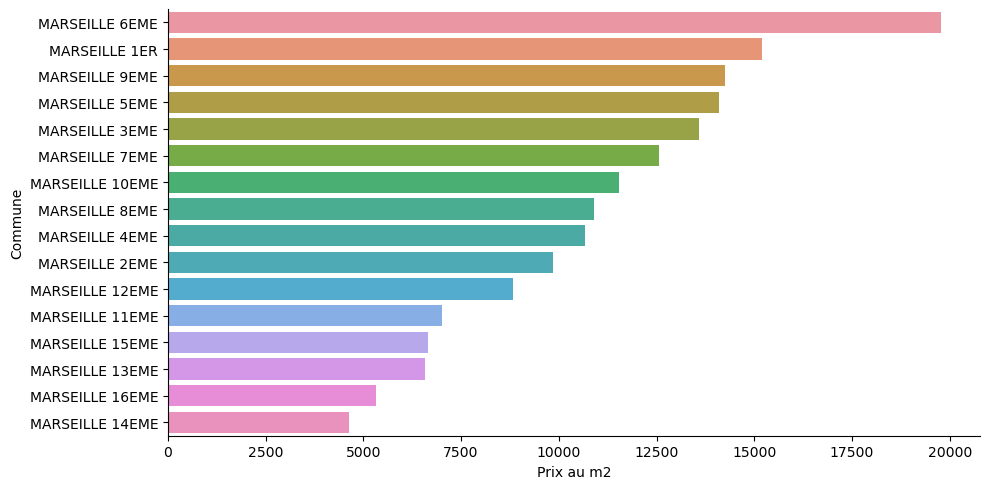

In [49]:
plt.figure(figsize=(16,8))
sns.catplot(data=DVFmoy.sort_values("Prix au m2", ascending=False), x='Prix au m2', y='Commune', kind='bar', aspect=2, legend='Prix au m2 comprenant les terrains')
plt.show()

Ainsi, les biens immobiliers construits dont le prix de vente au $m{^2}$ était le plus élevé en 2021 se situent dans les premiers arrondissements de Marseille, en particulier le 6ème, le 1er, le 3ème et le 5ème. On doit cependant considérer que les maisons ne sont ici pas prises en compte, ce qui changerait certainement l'ordre de ces arrondissements.

## Modélisations des prix des valeurs foncières



Le code est présent dans le notebook *Modelisation.ipynb*

In [ ]:
!git clone https://github.com/nkhenissi/pyhton-for-the-data-scientist.git

In [9]:
%cd pyhton-for-the-data-scientist

/content/pyhton-for-the-data-scientist


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Code service sages  Reference document  1 Articles CGI  \
count                  0.0                 0.0             0.0   
unique                 NaN                 NaN             NaN   
top                    NaN                 NaN             NaN   
freq                   NaN                 NaN             NaN   
mean                   NaN                 NaN             NaN   
std                    NaN                 NaN             NaN   
min                    NaN                 NaN             NaN   
25%                    NaN                 NaN             NaN   
50%                    NaN                 NaN             NaN   
75%                    NaN                 NaN             NaN   
max                    NaN                 NaN             NaN   

        2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
count              0.0             0.0             0.0             0.0   
unique             NaN             NaN             NaN     

<ipython-input-10-a96fd5a2bef8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


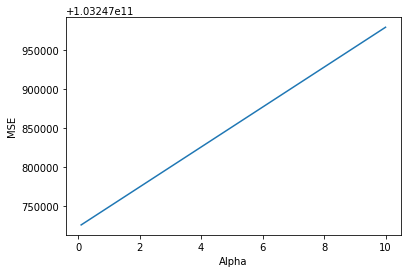

Mean Absolute Error: 238932.51
Mean Squared Error: 124201741372.81
R2 Score: -0.10
Mean Absolute Error: 238932.51
Mean Squared Error: 124201741372.81
R2 Score: -0.10
Mean Squared Error: 13653500105467.55


<ipython-input-10-272c6db5c57f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Mean Absolute Error: 1260440.08
Mean Squared Error: 15921857069541.69
R2 Score: -0.08


In [10]:
%run Modelisation.ipynb


Pour la modélisation, on a choisi la base de donnée df_dvf puisqu'elle comporte plus de données et on a gardé comme variables explicatives : 


*   Variable numérique: "surface relle bâti"
*   Variables catégorielles: "Code postal", "code departement" , "code commune", "code voie" et "code voie"

Nous avons utilisé les modèles de régression Lasso, SVM et Random Forest pour prédire les valeurs foncières à partir de différentes variables explicatives relatives à l'emplacement des biens immobiliers. En utilisant les métriques de performance R2, MSE et MAE, nous avons constaté que ces modèles présentaient une performance faible, ce qui signifie qu'ils ne parvenaient pas à expliquer de manière significative la variance des données ou à prédire correctement les valeurs cibles (valeurs foncières).

Il y a plusieurs raisons qui peuvent expliquer une telle performance. Tout d'abord, il est possible que les variables explicatives choisies ne soient pas suffisamment corrélées à la variable cible, ce qui rend difficile la prédiction de cette dernière. Dans ce cas, il serait recommandé de sélectionner de nouvelles variables explicatives autres que celles en relation avec l'emplacement géographique du bien et qui soient plus pertinentes permettant une meilleure explication de la variance des données. 

Il est également possible que le modèle choisi ne soit pas adapté aux données. Chaque modèle a ses propres spécificités et peut être plus ou moins adapté à certaines situations. Dans ce cas, il serait recommandé de tester d'autres modèles et de comparer leurs performances afin de choisir celui qui convient le mieux aux données.

Enfin, il peut être nécessaire de collecter de nouvelles données pour entraîner le modèle. Plus le modèle dispose de données, plus il est en mesure d'apprendre et de s'adapter aux données, ce qui peut améliorer sa performance.

En résumé, pour améliorer la performance des modèles de régression Lasso, SVM et Random Forest, nous recommandons de sélectionner de nouvelles variables explicatives pertinentes, de tester différents modèles et de collecter de nouvelles données pour entraîner le modèle.

## Visualisation des prix affichés par arrondissement

## Conclusion

On remarque que les prix du foncier à Marseille sont très disparates, et la ville est très inégalitaire.